# Segmenting Data with k-Means Clustering

## Learning Objectives
The primary objective of clustering is to group items within a dataset based on similarity. **k-Means Clustering** is one of the most popular and easy to use clustering approaches. With k-Means Clustering, similarity is based on a distance metric known as euclidean distance. By the end of this tutorial, you will have learned: 
+ How to import, explore and prepare data for k-Means Clustering
+ How to segment data using k-Means Clustering
+ How to evaluate and visualize clusters
+ How to choose an appropriate number of clusters
+ How to analyze the results of k-Means Clustering

## 1. Collect the Data
Let's import and preview it:

In [1]:
import pandas as pd
customers = pd.read_csv("mallcustomers.csv")

In [2]:
customers.head()

,CustomerID,Gender,Age,Income,SpendingScore
0,1,Male,19,15000,39
1,2,Male,21,15000,81
2,3,Female,20,16000,6
3,4,Female,23,16000,77
4,5,Female,31,17000,40


## 2. Explore the Data
Next, let's get a concise summary of the structure and the values within the dataset:

In [3]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     200 non-null    int64 
 1   Gender         200 non-null    object
 2   Age            200 non-null    int64 
 3   Income         200 non-null    int64 
 4   SpendingScore  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
customers.describe(include = 'all').round(2)

,CustomerID,Gender,Age,Income,SpendingScore
count,200.00,200,200.00,200.00,200.00
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,112,NaN,NaN,NaN
mean,100.50,NaN,38.85,60560.00,50.20
std,57.88,NaN,13.97,26264.72,25.82
min,1.00,NaN,18.00,15000.00,1.00
25%,50.75,NaN,28.75,41500.00,34.75
50%,100.50,NaN,36.00,61500.00,50.00
75%,150.25,NaN,49.00,78000.00,73.00


A visual exploration of the dataset can provide us with some additional insight.

In [5]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme()

/var/folders/3f/_h26qvbj7m109mnmtwmmcvr40000gn/T/ipykernel_7484/3998888332.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data = customers,


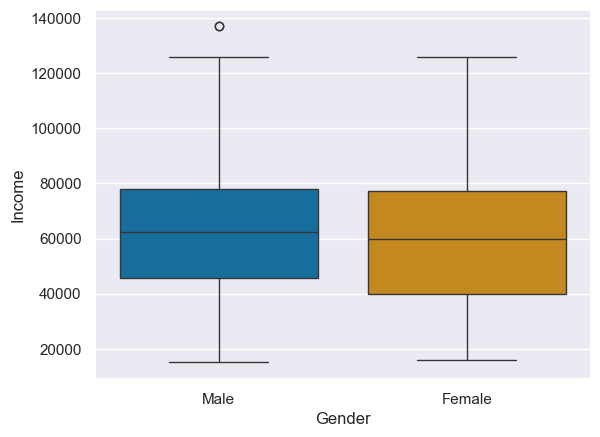

In [6]:
ax = sns.boxplot(data = customers, 
                 x = 'Gender', 
                 y = 'Income', 
                 palette = 'colorblind')

/var/folders/3f/_h26qvbj7m109mnmtwmmcvr40000gn/T/ipykernel_7484/1410978401.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data = customers,


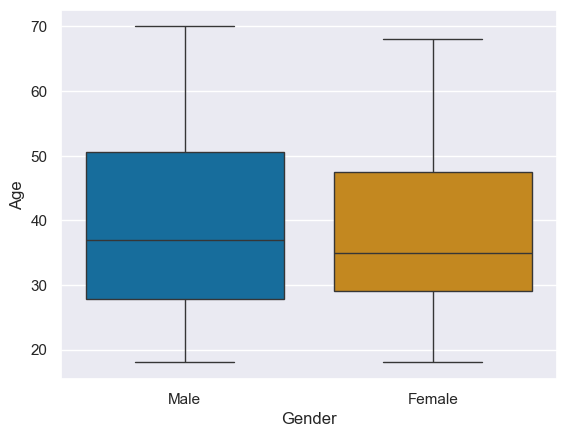

In [7]:
ax = sns.boxplot(data = customers, 
                 x = 'Gender', 
                 y = 'Age', 
                 palette = 'colorblind')

/var/folders/3f/_h26qvbj7m109mnmtwmmcvr40000gn/T/ipykernel_7484/2112944311.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data = customers,


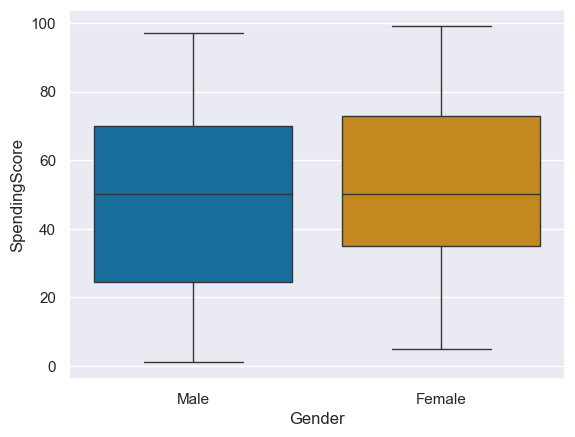

In [8]:
ax = sns.boxplot(data = customers, 
                 x = 'Gender', 
                 y = 'SpendingScore', 
                 palette = 'colorblind')

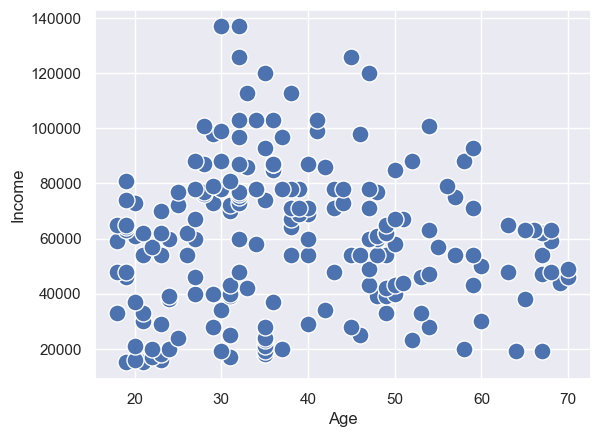

In [9]:
ax = sns.scatterplot(data = customers, 
                     x = 'Age', 
                     y = 'Income',
                     s = 150)

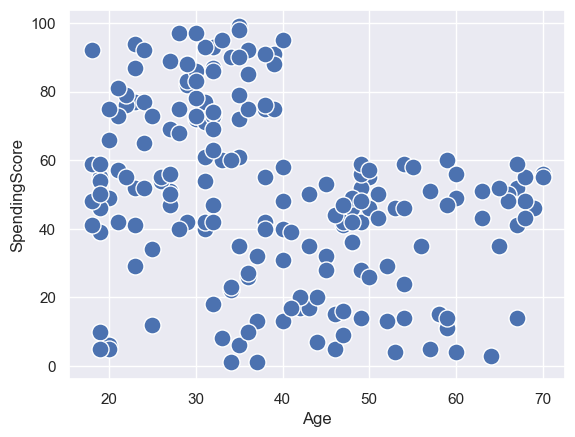

In [10]:
ax = sns.scatterplot(data = customers, 
                     x = 'Age', 
                     y = 'SpendingScore',
                     s = 150)

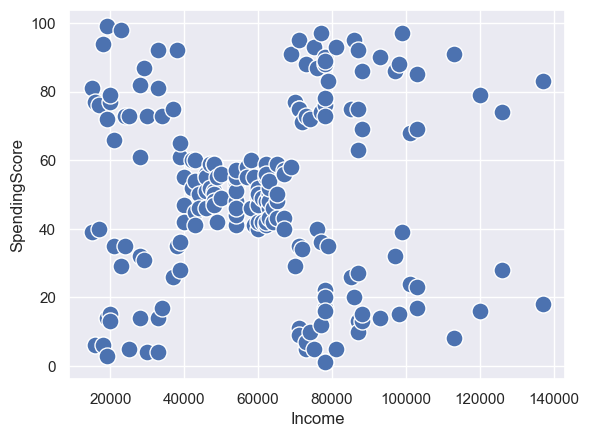

In [11]:
ax = sns.scatterplot(data = customers, 
                     x = 'Income', 
                     y = 'SpendingScore',
                     s = 150)

## 3. Prepare the Data

In [12]:
customers[['Income', 'SpendingScore']].describe().round(2)

,Income,SpendingScore
count,200.00,200.00
mean,60560.00,50.20
std,26264.72,25.82
min,15000.00,1.00
25%,41500.00,34.75
50%,61500.00,50.00
75%,78000.00,73.00
max,137000.00,99.00


In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [14]:
customers_scaled = scaler.fit_transform(customers[['Income', 'SpendingScore']])

In [15]:
customers_scaled = pd.DataFrame(customers_scaled, columns = ['Income', 'SpendingScore'])

In [16]:
customers_scaled.describe().round(2)

,Income,SpendingScore
count,200.00,200.00
mean,-0.00,-0.00
std,1.00,1.00
min,-1.74,-1.91
25%,-0.73,-0.60
50%,0.04,-0.01
75%,0.67,0.89
max,2.92,1.89


## 3. Create the Clusters

In [17]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 3, n_init = 25, random_state = 1234)

In [18]:
km.fit(customers_scaled)

KMeans(n_clusters=3, n_init=25, random_state=1234)

In [19]:
km.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1], dtype=int32)

In [20]:
km.inertia_

157.70400815035947

## 4. Evaluate and Visualize the Clusters 

In [21]:
pd.Series(km.labels_).value_counts().sort_index()

0     38
1     39
2    123
Name: count, dtype: int64

In [22]:
km.cluster_centers_

array([[ 1.00919971, -1.22553537],
       [ 0.99158305,  1.23950275],
       [-0.62618966, -0.01439238]])

In [23]:
cluster_centers = pd.DataFrame(km.cluster_centers_, 
                               columns = ['Income', 'SpendingScore'])
cluster_centers

,Income,SpendingScore
0,1.009200,-1.225535
1,0.991583,1.239503
2,-0.626190,-0.014392


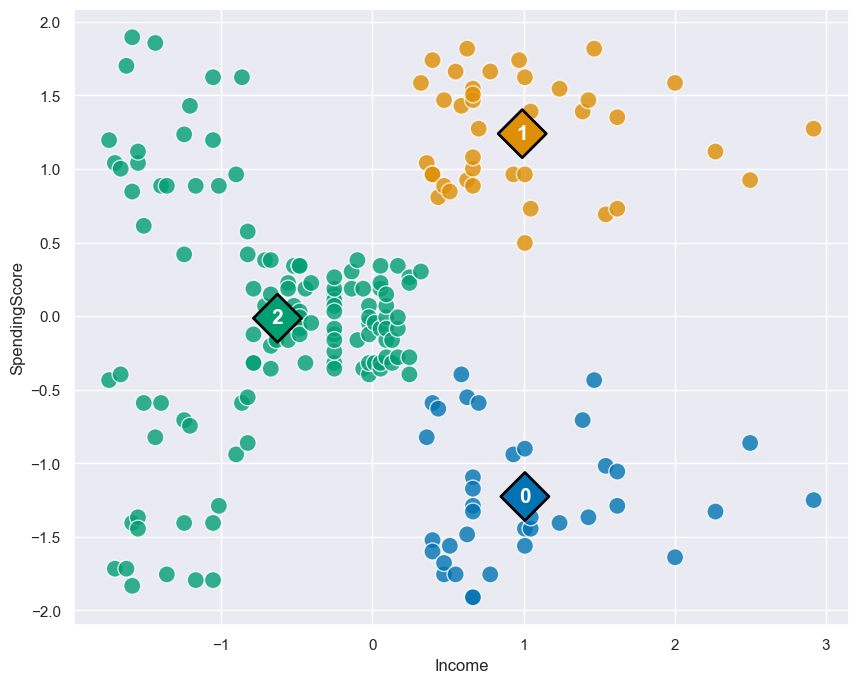

In [24]:
# Set the figure size
plt.figure(figsize=(10, 8))

#Plot the Clusters
ax = sns.scatterplot(data = customers_scaled,
                     x = 'Income',
                     y = 'SpendingScore', 
                     hue = km.labels_, 
                     palette = 'colorblind', 
                     alpha = 0.8, 
                     s = 150,
                     legend = False)

#Plot the Centroids
ax = sns.scatterplot(data = cluster_centers, 
                     x = 'Income',
                     y = 'SpendingScore', 
                     hue = cluster_centers.index, 
                     palette = 'colorblind', 
                     s = 600,
                     marker = 'D',
                     ec = 'black', 
                     legend = False)

# Add Centroid Labels
for i in range(len(cluster_centers)):
               plt.text(x = cluster_centers.Income[i], 
                        y = cluster_centers.SpendingScore[i],
                        s = i, 
                        horizontalalignment='center',
                        verticalalignment='center',
                        size = 15,
                        weight = 'bold',
                        color = 'white')

## 5. Choose the right number of Clusters

### The Within Cluster Sum of Squares (WCSS)

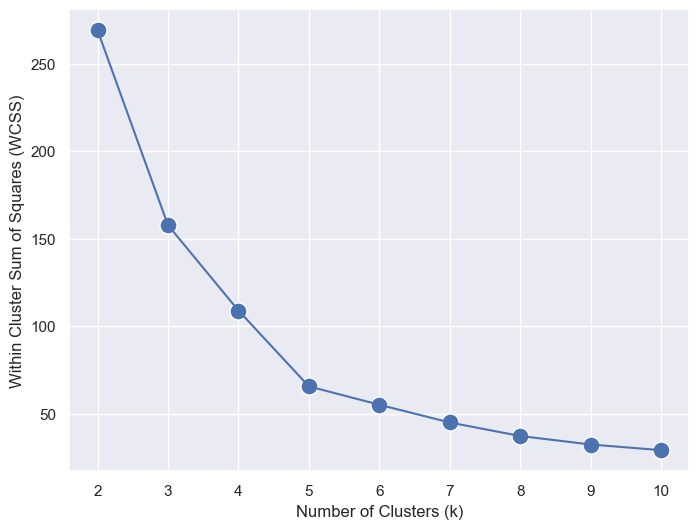

In [25]:
wcss = []
for k in range(2, 11):
    km = KMeans(n_clusters = k, n_init = 25, random_state = 1234)
    km.fit(customers_scaled)
    wcss.append(km.inertia_)

wcss_series = pd.Series(wcss, index = range(2, 11))

plt.figure(figsize=(8, 6))
ax = sns.lineplot(y = wcss_series, x = wcss_series.index)
ax = sns.scatterplot(y = wcss_series, x = wcss_series.index, s = 150)
ax = ax.set(xlabel = 'Number of Clusters (k)', 
            ylabel = 'Within Cluster Sum of Squares (WCSS)')

### The Average Silhouette Score

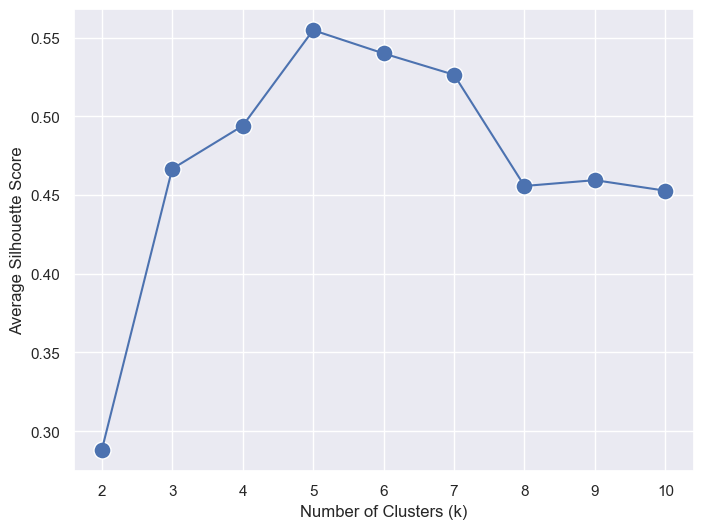

In [26]:
from sklearn.metrics import silhouette_score

silhouette = []
for k in range(2, 11):
    km = KMeans(n_clusters = k, n_init = 25, random_state = 1234)
    km.fit(customers_scaled)
    silhouette.append(silhouette_score(customers_scaled, km.labels_))

silhouette_series = pd.Series(silhouette, index = range(2, 11))

plt.figure(figsize=(8, 6))
ax = sns.lineplot(y = silhouette_series, x = silhouette_series.index)
ax = sns.scatterplot(y = silhouette_series, x = silhouette_series.index, s = 150)
ax = ax.set(xlabel = 'Number of Clusters (k)', 
            ylabel = 'Average Silhouette Score')

### The Calinski Harabasz Score

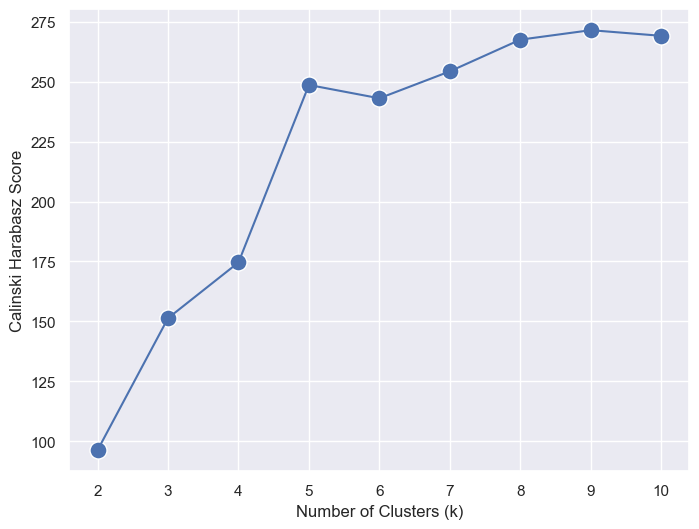

In [27]:
from sklearn.metrics import calinski_harabasz_score

calinski = []
for k in range(2, 11):
    km = KMeans(n_clusters = k, n_init = 25, random_state = 1234)
    km.fit(customers_scaled)
    calinski.append(calinski_harabasz_score(customers_scaled, km.labels_))

calinski_series = pd.Series(calinski, index = range(2, 11))

plt.figure(figsize=(8, 6))
ax = sns.lineplot(y = calinski_series, x = calinski_series.index)
ax = sns.scatterplot(y = calinski_series, x = calinski_series.index, s = 150)
ax = ax.set(xlabel = 'Number of Clusters (k)', 
            ylabel = 'Calinski Harabasz Score')

## 6. Analyze and Interpret the Clusters

In [28]:
km = KMeans(n_clusters = 5, n_init = 25, random_state = 1234)
km.fit(customers_scaled)

KMeans(n_clusters=5, n_init=25, random_state=1234)

In [29]:
cluster_centers = pd.DataFrame(km.cluster_centers_, columns = ['Income', 'SpendingScore'])

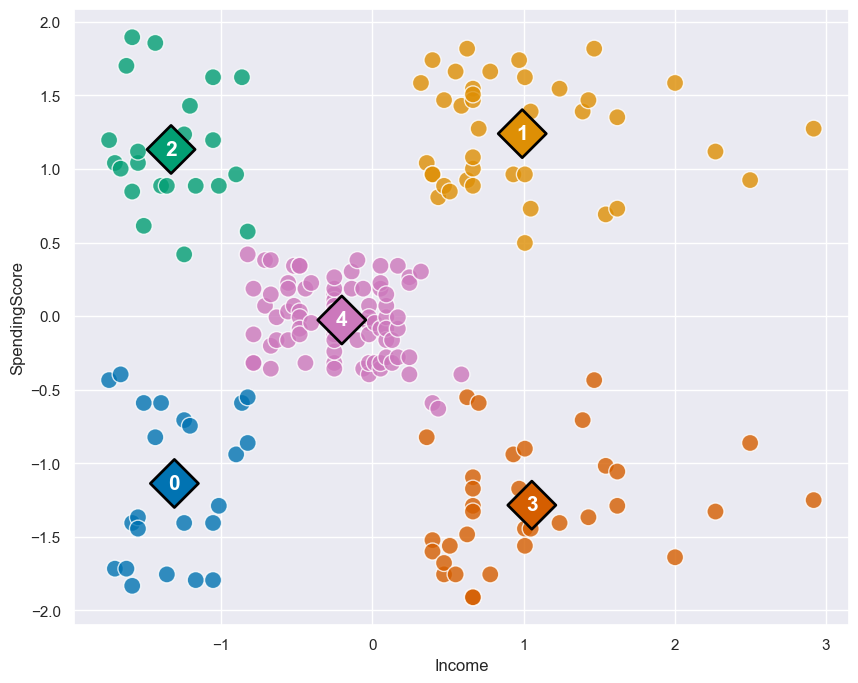

In [30]:
# Set the figure size
plt.figure(figsize=(10, 8))

#Plot the Clusters
ax = sns.scatterplot(data = customers_scaled,
                     x = 'Income',
                     y = 'SpendingScore', 
                     hue = km.labels_, 
                     palette = 'colorblind', 
                     alpha = 0.8, 
                     s = 150,
                     legend = False)

#Plot the Centroids
ax = sns.scatterplot(data = cluster_centers, 
                     x = 'Income',
                     y = 'SpendingScore', 
                     hue = cluster_centers.index, 
                     palette = 'colorblind', 
                     s = 600,
                     marker = 'D',
                     ec = 'black', 
                     legend = False)


# Add Centroid Labels
for i in range(len(cluster_centers)):
               plt.text(x = cluster_centers.Income[i], 
                        y = cluster_centers.SpendingScore[i],
                        s = i, 
                        horizontalalignment='center',
                        verticalalignment='center',
                        size = 15,
                        weight = 'bold',
                        color = 'white')

In [31]:
customers['Cluster'] = km.labels_.tolist()
customers.head(10)

,CustomerID,Gender,Age,Income,SpendingScore,Cluster
0,1,Male,19,15000,39,0
1,2,Male,21,15000,81,2
2,3,Female,20,16000,6,0
3,4,Female,23,16000,77,2
4,5,Female,31,17000,40,0
5,6,Female,22,17000,76,2
6,7,Female,35,18000,6,0
7,8,Female,23,18000,94,2
8,9,Male,64,19000,3,0
9,10,Female,30,19000,72,2


In [32]:
customers = pd.get_dummies(customers, columns = ['Gender'])
customers.head(10)

,CustomerID,Age,Income,SpendingScore,Cluster,Gender_Female,Gender_Male
0,1,19,15000,39,0,False,True
1,2,21,15000,81,2,False,True
2,3,20,16000,6,0,True,False
3,4,23,16000,77,2,True,False
4,5,31,17000,40,0,True,False
5,6,22,17000,76,2,True,False
6,7,35,18000,6,0,True,False
7,8,23,18000,94,2,True,False
8,9,64,19000,3,0,False,True
9,10,30,19000,72,2,True,False


In [33]:
customers.agg({
    'Gender_Female': 'mean',
    'Gender_Male': 'mean',
    'Age': 'median',
    'Income': 'median',
    'SpendingScore': 'median'}).round(2)

Gender_Female        0.56
Gender_Male          0.44
Age                 36.00
Income           61500.00
SpendingScore       50.00
dtype: float64

In [34]:
customers.groupby('Cluster').agg({
    'Gender_Female': 'mean',
    'Gender_Male': 'mean',
    'Age': 'median',
    'Income': 'median',
    'SpendingScore': 'median'}).round(2)

,Gender_Female,Gender_Male,Age,Income,SpendingScore
Cluster,,,,,
0,0.61,0.39,46.0,25000.0,17.0
1,0.54,0.46,32.0,79000.0,83.0
2,0.59,0.41,23.5,24500.0,77.0
3,0.46,0.54,42.0,85000.0,16.0
4,0.59,0.41,46.0,54000.0,50.0


#### What actionable insights can you come up with based on the clustering results?